# Hack Western - Skin Cancer

In [29]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import pickle
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

__Split data into train, test and val__

In [3]:
import splitfolders
splitfolders.ratio('Skin cancer/dataset', output="Skin cancer/train-test-val_datasets", seed=123, ratio=(.8, 0.1, 0.1))

Copying files: 3297 files [00:17, 187.25 files/s]


__Data Augmentation__

In [5]:
image_dimension = 224
batch_size = 32

# Creating training, validation, and test image flows
train_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               width_shift_range= 0.2,
                               height_shift_range=0.2,
                               rotation_range=0.3,
                               horizontal_flip = True)



test_gen = ImageDataGenerator(rescale = 1/255)


##############################################################################

train_set = train_gen.flow_from_directory('Skin cancer/train-test-val_datasets/train',
                                          target_size = (image_dimension,image_dimension), 
                                          batch_size = batch_size,
                                          class_mode = 'categorical')


val_gen = test_gen.flow_from_directory('Skin cancer/train-test-val_datasets/val',
                                      target_size = (image_dimension,image_dimension),
                                      batch_size = batch_size,
                                      class_mode = 'categorical')



test_set = test_gen.flow_from_directory('Skin cancer/train-test-val_datasets/test',
                                        target_size = (image_dimension,image_dimension),
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle=False)

Found 2637 images belonging to 2 classes.
Found 329 images belonging to 2 classes.
Found 331 images belonging to 2 classes.


In [6]:
train_set.class_indices

{'benign': 0, 'malignant': 1}

### Modeling

In [19]:
CNN_model = Sequential()

CNN_model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3))) #firstlayer
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3)))
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (6, 6), activation='relu',input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (6, 6), activation='relu',padding="same",input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Flatten())
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(2,activation="softmax"))
CNN_model.compile(loss=keras.losses.categorical_crossentropy,optimizer = "adam",metrics=["accuracy"])
CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 49, 49, 64)       

In [32]:
epochs = 10
batch_size = 32
num_of_train_samples = 2637 
num_of_val_samples = 329 

CNNmodel = CNN_model.fit_generator(
    train_set,
    steps_per_epoch = num_of_train_samples / batch_size,
    epochs = epochs,
    validation_data = val_gen,
    validation_steps = num_of_val_samples / batch_size
)

Epoch 1/10
82/82 [==============================] - 91s 1s/step - loss: 0.4417 - accuracy: 0.7797 - val_loss: 0.3754 - val_accuracy: 0.8267
Epoch 2/10
82/82 [==============================] - 90s 1s/step - loss: 0.4171 - accuracy: 0.7888 - val_loss: 0.3777 - val_accuracy: 0.8298
Epoch 3/10
82/82 [==============================] - 89s 1s/step - loss: 0.4091 - accuracy: 0.7956 - val_loss: 0.4485 - val_accuracy: 0.8024
Epoch 4/10
82/82 [==============================] - 90s 1s/step - loss: 0.4077 - accuracy: 0.7990 - val_loss: 0.4143 - val_accuracy: 0.8085
Epoch 5/10
82/82 [==============================] - 95s 1s/step - loss: 0.4274 - accuracy: 0.7933 - val_loss: 0.4524 - val_accuracy: 0.7933
Epoch 6/10
82/82 [==============================] - 101s 1s/step - loss: 0.4066 - accuracy: 0.8055 - val_loss: 0.4954 - val_accuracy: 0.7386
Epoch 7/10
82/82 [==============================] - 98s 1s/step - loss: 0.4214 - accuracy: 0.7979 - val_loss: 0.3824 - val_accuracy: 0.8176
Epoch 8/10
82/82 [=

In [33]:
CNN_model.save('CNN_model_skin.h5')

In [34]:
score = CNN_model.evaluate(test_set, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 3s 253ms/step - loss: 0.3944 - accuracy: 0.8127
Test loss: 0.39440616965293884
Test accuracy: 0.8126888275146484


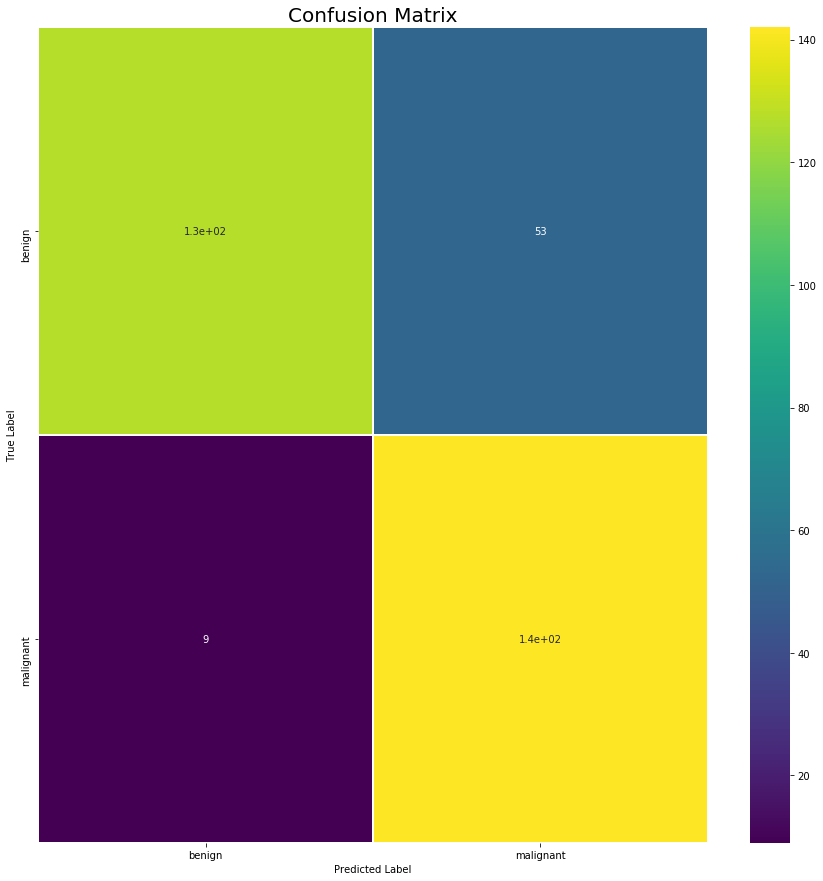

In [35]:
conf_mat=confusion_matrix(y_true=test_set.classes[test_set.index_array], y_pred=np.argmax(CNN_model.predict(test_set), axis=1))

plt.figure(figsize = (15,15))
x_axis_labels = ['benign', 'malignant']
y_axis_labels =  ['benign', 'malignant']
sns.heatmap(conf_mat,annot=True,cbar=True,cmap="viridis",linewidths=0.7, xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Confusion Matrix',size = 20)
plt.xlabel("Predicted Label", size = 10)
plt.ylabel("True Label", size = 10)
plt.show()

In [36]:
target_names = list(train_set.class_indices.keys())
trueClass=test_set.classes[test_set.index_array]
predictedClass=np.argmax(CNN_model.predict(test_set), axis=1)

In [37]:
print(classification_report(trueClass, predictedClass, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.93      0.71      0.80       180
   malignant       0.73      0.94      0.82       151

    accuracy                           0.81       331
   macro avg       0.83      0.82      0.81       331
weighted avg       0.84      0.81      0.81       331

